In [ ]:
# Calculating correlation by using daily return in percentage
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
# Data processing part, daily price data ranges from May 1, 2016 and October 31, 2017
file = 'DReturn.xlsx' 
data = pd.read_excel(file)
data['Date'] = pd.to_datetime(data.Date)
data.set_index('Date', inplace = True)
# The interpolation method I use here is linear interpolation.
data.dropna(axis=1, how='all')
data = data.interpolate(method='linear', axis=0).ffill().bfill()
data.dropna(axis=1, how='any')
# No nan value inside this table
data.head()
# Generate the correlation table
data_corr = data.corr()

In [2]:
# Find the max correlation in the table, and return the pair of stock, n denote the maximum n pair stock.
def findMaxIndex(data_corr):
    Index = data_corr.index
    M = 0
    row = Index[0]
    col = Index[0]
    for i in Index:
        for j in Index:
            if data_corr[i][j] > M and i != j:
                M = data_corr[i][j]
                row = i
                col = j
    return row,col

import copy
def findPairStock(dataCorr, n):
    dataFrame = copy.deepcopy(dataCorr)
    L = []
    for i in range(n):
        I = findMaxIndex(dataFrame)
        dataFrame[I[0]][I[1]] = -1
        dataFrame[I[1]][I[0]] = -1
        L.append(I)
    return L

I = findPairStock(data_corr, 5)
for i in I:
    print('corrlation between {0} and {1} are: {2}'.format(i[0], i[1], data_corr[i[0]][i[1]]))

corrlation between EEQ and EEP are: 0.9233413370790494
corrlation between ESV and RDC are: 0.8754654278867842
corrlation between ESV and NE are: 0.868943288091722
corrlation between RDC and RIG are: 0.8674188953501465
corrlation between ATO and OGS are: 0.8641786660489951


In [3]:
priceDict = {}
# The actual stock price for Apr 29th 2016
priceDict['ATO'] = 72.56
priceDict['EEP'] = 21.61
priceDict['EEQ'] = 21.17
priceDict['ESV'] = 11.97
priceDict['NE'] = 11.22
priceDict['OGS'] = 58.47
priceDict['RDC'] = 18.8
priceDict['RIG'] = 11.07
data = data[['ATO', 'EEP', 'EEQ', 'ESV', 'NE', 'OGS', 'RDC', 'RIG']]
# Change the daily return table to actual pricing table
data.iloc[0] = (data.iloc[0] * 0.01 + 1) * [72.56, 21.61, 21.17, 11.97, 11.22, 58.47, 18.8, 11.07]
for i in range(1,data.shape[0]):
    data.iloc[i] = (data.iloc[i] * 0.01 + 1) * data.iloc[i-1]

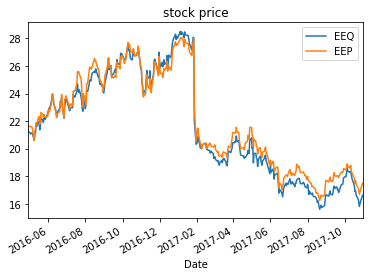

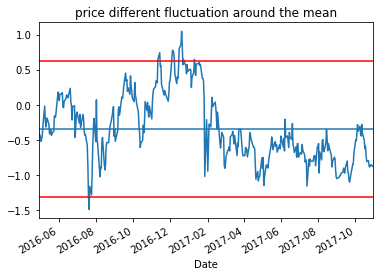

Cumulated profit: 1.9283788478148705


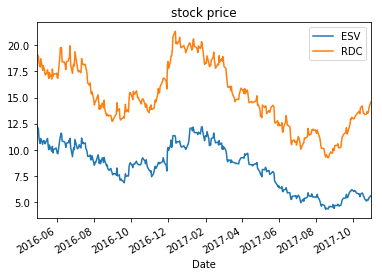

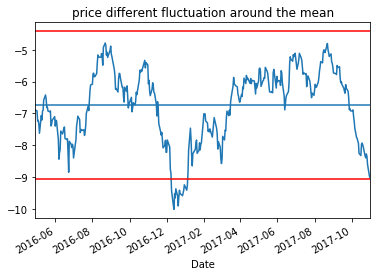

Cumulated profit: 2.316425744088474


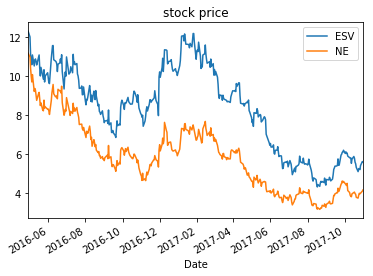

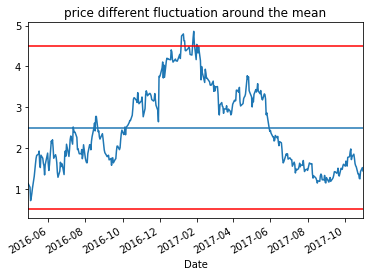

Cumulated profit: 1.99552739279948


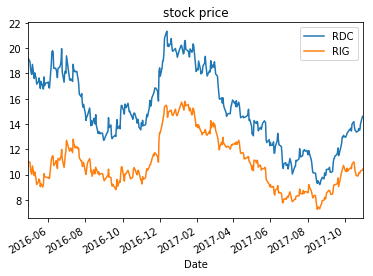

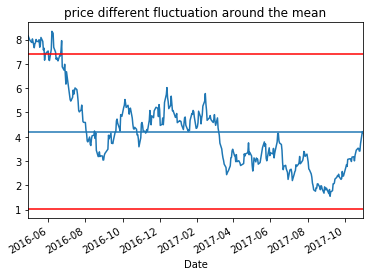

Cumulated profit: 3.2042710319069703


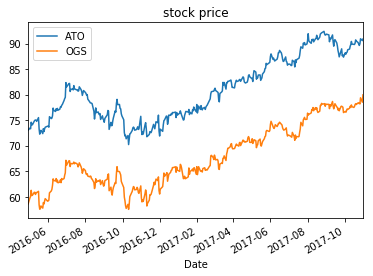

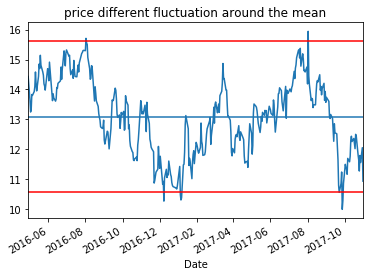

Cumulated profit: 7.5988984109499516


In [4]:
import matplotlib.pyplot as plt
# Pair trading strategy,it is not self-financing strategy, we use the long one share and short one share method
def pairTrading(I):
    for i in I:
        data[list(i)].plot(title = 'stock price')
        plt.show()
        priceDifference = data[i[0]] - data[i[1]]
        priceDifference.plot(title = "price different fluctuation around the mean")
        mean = priceDifference.mean()
        std = priceDifference.std()
        plt.axhline(mean)
        upperBound = mean + 2 * std
        lowerBound = mean - 2 * std
        plt.axhline(upperBound, color = 'red')
        plt.axhline(lowerBound, color = 'red')
        plt.show()
        # If the difference is two standard deviation away, execute buy low sell high trading. 
        # And when gap return to mean, close the deal. 
        up = 0
        down = 0
        count = 0
        for price in priceDifference:
            # price hit the upperBound
            if price > upperBound:
                up = 1
            if up == 1 and price < mean:
                up = 0
                count = count + 1 
            # price hit the lowerBound
            if price < lowerBound:
                down = 1
            if down == 1 and price > mean:
                down = 0
                count = count + 1
        profit = count * std * 2
        print('Cumulated profit: {}'.format(profit)) 
        
pairTrading(I)